In [1]:
import pandas as pd
import numpy as np
import random
import math
import gc
import matplotlib.pylab as plt
import networkx as nx

C:\Users\gohzh\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [9]:
nodes = 25
edges = []
# Initialize adjacency matrix
def init_adjacency_matrix(nodes, edges):
    adjacency_matrix = np.zeros((nodes,nodes),dtype = np.int)

    edge_probability = .0085 if nodes > 100 else 0.09


    edges_cnt = 0
    for i in range(nodes):
        for j in range(i):
            prob = random.random()
            if prob < edge_probability:
                adjacency_matrix[i,j] = 1
                edges.append((i,j))
                edges_cnt += 1

    return adjacency_matrix
init_adjacency_matrix(nodes, edges)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      

In [10]:
G=nx.Graph()
G.add_nodes_from(list(range(0,nodes)))
G.add_edges_from(edges)

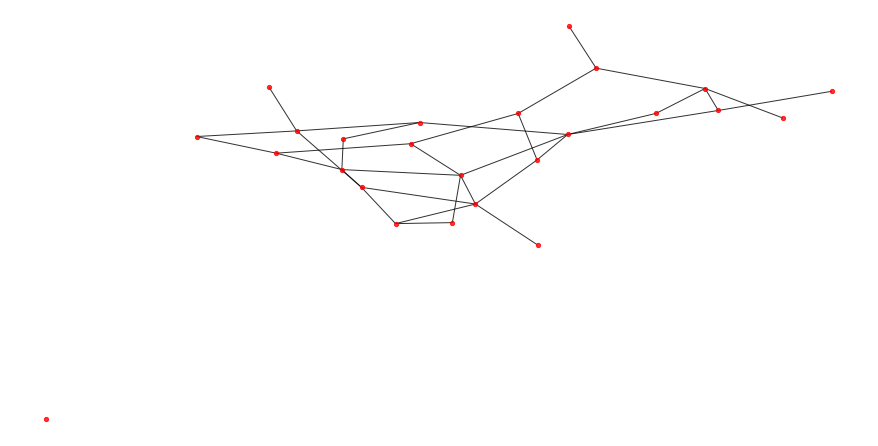

In [11]:
plt.figure(figsize=(12,6))
nx.draw(G,node_color='r', node_size=18, alpha=0.8)
plt.show() # display

In [5]:
# Initialize variables and constants
num_ants = 10
vertex_weights = {node:1 for node in range(nodes)}
tau_o = random.random() 
vertex_phermones = {node:tau_o for node in range(nodes)}
vertex_values = {node: vertex_phermones[node]*sum(adjacency_matrix[node]) for node in range(nodes)}
solution_set = []
q_o = 0.5
alpha = 0.1
psi = 0.3

In [6]:
# Helpers
def get_adjacent_vertices(adj_mat,vertex):
    vertices = []
    for vert in adj_mat[vertex]:
        if vert > 0:
            vertices.append(vert)
            
    return vertices

def get_arg_max_phermone(vertex_values):
    arg_max = []
    max_val = -1
    for vertex, value in vertex_values.items():
        if value > max_val:
            max_val = value
            arg_max = [vertex]
            
        elif value == max_val:
            arg_max.append(vertex)
            
    return arg_max

In [7]:
def get_psi_k(vertex_i, vertex_j):
    return adjacency_matrix[vertex_i][vertex_j]

# Eta function
def get_eta_k(vertex):
    total_edges = sum([get_psi_k(vertex_i,vertex_j) for vertex_i in range(nodes) for vertex_j in range(nodes)])
    weight_vertex = vertex_weights[vertex]
    return total_edges/weight_vertex

# Probability
def get_transition_probabilty(vertex, q_o=q_o):
    q = random.random()
    
    if q <=q_o:
        tau_j = get_tau_j(vertex)
        eta_j_k = (get_eta_k(vertex))**alpha
        available_vertices = get_adjacent_vertices(adjacency_matrix,vertex)
        denominator = sum([tau_j*get_eta_k(vert) for vert in available_vertices])
        return tau_j*eta_j_k / denominator
    
    arg_max = get_arg_max_phermone(vertex_values)
    
    if vertex in arg_max:
        return 1
    return 0
        

# Local update rule
def get_local_tau_j(vertex_j):
    return (1-psi)*vertex_phermones[vertex_j] + psi*tau_o
    
# Global update rule 
def get_delta_tau_j():
    return 1/(sum(vertex_weights(vertex_j) for vertex_j in solution_set))
    
def get_tau_j(vertex_i):
    delta_tau= get_delta_tau_j()
    tau_j=(1-get_transition_probabilty(vertex_i))*tau_j+delta_tau
    return tau_j

def all_ants_finished():
    delta_tau = get_delta_tau_j()
    if delta_tau == 1/len(vertices):
        print("All Ants Finished")
        return True
    return False

In [ ]:
def OptCover(startindex, Connections, Covered, Sum):
    if startindex >= SizeofGraph:
        return
    if Sum > BestValue:
        return
    if Covered == SizeofGraph:
        if Sum < BestValue:
            BestValue = Sum
            return
def ACO():
    #Reset adjacency matrix and graph info
    edges = []
    adj_mat = init_adjacency_matrix(nodes, edges)
    G=nx.Graph()
    G.add_nodes_from(list(range(0,nodes)))
    G.add_edges_from(edges)
    vertices_copy = vertices
    count = 0
    #lines 19-38 need to be iterated
    if_finished = all_ants_finished()
    if not if_finished:
        while count != 1:
            for b in vertices_copy:
                if not (b in vertices):
                    vertex = b
                    solution_set.append(b)
                else:
                    if len(solution_set) >= len(vertices):
                        vertex = b
                        break
                    else:
                        continue
            get_adjacent_vertices(adj_mat, vertex)
            count += 1
    prob = get_transition_probabilty(vertex, q_o=q_o)
    get_local_tau_j(vertex)
    get_delta_tau_j()
    if_finished = all_ants_finished()
    